### Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from pycaret.classification import *

In [3]:
#Model KNN

In [ ]:
#Model Random Forest

In [ ]:
#Model Naive bay

### Idea

In [ ]:
#แบ่ง

### Explore Data

In [2]:
data = pd.read_csv('telomere_bins4.csv')

In [3]:
data

,X,dem_ageyear,rbc,mcv,mch,alt,hct,pe_bmi,tsratio,y_cut
0,0,26,5.06,91.9,30.2,36,46.5,19.71374,2.194,4
1,1,29,6.19,83.2,26.8,158,51.5,52.75117,2.134,4
2,2,25,5.72,75.0,25.7,21,42.9,28.37551,2.134,4
3,3,25,5.76,74.1,23.8,26,42.7,18.90179,2.029,4
4,4,27,6.61,58.2,19.2,29,38.5,23.41329,1.913,4
...,...,...,...,...,...,...,...,...,...,...
162,162,78,4.02,95.3,31.8,16,38.3,17.88770,0.291,1
163,163,66,5.37,85.8,27.7,29,46.1,26.37932,0.263,1
164,164,71,4.73,87.3,30.0,19,41.3,18.56326,0.262,1
165,165,69,4.71,95.1,30.8,30,44.8,27.46163,0.259,1


In [4]:
a = ['dem_ageyear', 'rbc', 'mcv', 'mch', 'alt', 'hct', 'pe_bmi',
        'y_cut']
dt = data[a]

In [43]:
dt

,dem_ageyear,rbc,mcv,mch,alt,hct,pe_bmi,y_cut
0,0.234043,0.493976,0.353659,0.404494,0.405405,0.351351,0.387324,4
1,0.234043,0.214286,0.568182,0.553191,0.000000,0.351351,0.387324,4
2,0.234043,0.493976,0.153846,0.553191,0.405405,0.519481,0.387324,4
3,0.234043,0.493976,0.153846,0.160000,0.405405,0.519481,0.733333,4
4,0.234043,0.214286,0.153846,0.160000,0.405405,0.142857,0.387324,4
...,...,...,...,...,...,...,...,...
162,0.142857,0.111111,0.353659,0.404494,0.405405,0.000000,0.000000,1
163,0.375000,0.493976,0.600000,0.553191,0.405405,0.351351,0.387324,1
164,0.142857,0.404255,0.353659,0.404494,0.405405,0.519481,0.733333,1
165,0.142857,0.404255,0.353659,0.404494,0.405405,0.519481,0.387324,1


### Model 1 knn

In [47]:
s = setup(dt,target ='y_cut',normalize = True)

,Description,Value
0,Session id,7703
1,Target,y_cut
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3"
4,Original data shape,"(167, 8)"
5,Transformed data shape,"(167, 8)"
6,Transformed train set shape,"(116, 8)"
7,Transformed test set shape,"(51, 8)"
8,Numeric features,7
9,Preprocess,True


In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.4765,0.3799,0.4765,0.4624,0.4532,0.1859,0.1913,0.0630
knn,K Neighbors Classifier,0.4727,0.3838,0.4727,0.4504,0.4441,0.1653,0.1759,0.0520
dt,Decision Tree Classifier,0.4682,0.3472,0.4682,0.4879,0.4576,0.2099,0.2187,0.0360
lightgbm,Light Gradient Boosting Machine,0.4583,0.3720,0.4583,0.4345,0.4324,0.1437,0.1458,0.2130
rf,Random Forest Classifier,0.4485,0.3787,0.4485,0.4264,0.4191,0.1355,0.1450,0.0710
gbc,Gradient Boosting Classifier,0.4402,0.3592,0.4402,0.4351,0.4276,0.1419,0.1455,0.1030
nb,Naive Bayes,0.4068,0.3654,0.4068,0.4059,0.3750,0.1265,0.1449,0.0220
dummy,Dummy Classifier,0.4068,0.3000,0.4068,0.1681,0.2372,0.0000,0.0000,0.0190
lda,Linear Discriminant Analysis,0.3561,0.3050,0.3561,0.3406,0.3267,0.0109,0.0234,0.0320
lr,Logistic Regression,0.3462,0.3335,0.3462,0.3133,0.3071,-0.0262,-0.0177,2.3900


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [8]:
knn = create_model('knn',n_neighbors=3,metric = 'euclidean',p=2) 
#k=5 0.4780
#k=1 0.4061
###k=3 0.4848
#k=7 0.4409
#9 0.4742
#11 0.4750

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.6514,0.5000,0.5000,0.5000,0.2577,0.2605
1,0.4167,0.5144,0.4167,0.3417,0.3754,0.0870,0.0892
2,0.3333,0.5325,0.3333,0.2750,0.3013,-0.0435,-0.0446
3,0.5000,0.6171,0.5000,0.4444,0.4306,0.2421,0.2777
4,0.6667,0.8056,0.6667,0.6548,0.6468,0.4839,0.5020
5,0.0833,0.3979,0.0833,0.0694,0.0758,-0.4667,-0.5000
6,0.4545,0.0000,0.4545,0.4675,0.4394,0.1081,0.1147
7,0.3636,0.0000,0.3636,0.3030,0.3273,-0.0694,-0.0740
8,0.3636,0.0000,0.3636,0.3273,0.3434,-0.0405,-0.0411


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [12]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5833,0.7765,0.5833,0.6111,0.5417,0.3684,0.4226
1,0.4167,0.6469,0.4167,0.3889,0.3622,0.0968,0.1237
2,0.3333,0.5824,0.3333,0.2778,0.3000,-0.0323,-0.0335
3,0.4167,0.4980,0.4167,0.3519,0.3492,0.0562,0.0663
4,0.5833,0.7306,0.5833,0.5104,0.5150,0.3478,0.3810
5,0.4167,0.6971,0.4167,0.3730,0.3869,0.0968,0.1004
6,0.4545,0.0000,0.4545,0.4978,0.4524,0.0833,0.0874
7,0.5455,0.0000,0.5455,0.5909,0.4485,0.1791,0.3078
8,0.4545,0.0000,0.4545,0.3838,0.3810,0.0294,0.0382


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [13]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=23, p=2,
                     weights='uniform')

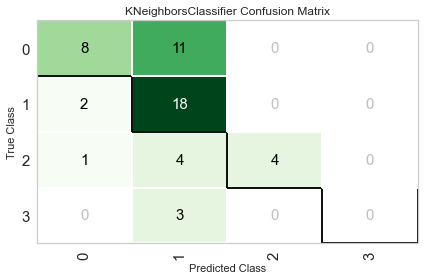

In [14]:
plot_model(tuned_knn , plot = 'confusion_matrix')

### Model 2 Random Forest

In [18]:
rf1 = setup(dt,target ='y_cut')

,Description,Value
0,Session id,1866
1,Target,y_cut
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3"
4,Original data shape,"(167, 8)"
5,Transformed data shape,"(167, 8)"
6,Transformed train set shape,"(116, 8)"
7,Transformed test set shape,"(51, 8)"
8,Numeric features,7
9,Preprocess,True


In [19]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5091,0.4447,0.5091,0.5339,0.4986,0.2640,0.2755,0.0170
et,Extra Trees Classifier,0.5023,0.3840,0.5023,0.4916,0.4753,0.2240,0.2352,0.0600
rf,Random Forest Classifier,0.4864,0.3679,0.4864,0.4804,0.4640,0.2028,0.2110,0.0700
knn,K Neighbors Classifier,0.4659,0.3864,0.4659,0.4358,0.4368,0.1706,0.1757,0.0220
gbc,Gradient Boosting Classifier,0.4485,0.3400,0.4485,0.4656,0.4293,0.1635,0.1703,0.0960
lda,Linear Discriminant Analysis,0.4470,0.4204,0.4470,0.4308,0.4205,0.1392,0.1454,0.0170
lightgbm,Light Gradient Boosting Machine,0.4386,0.3630,0.4386,0.4192,0.4078,0.1152,0.1216,0.0260
qda,Quadratic Discriminant Analysis,0.4341,0.3168,0.4341,0.3948,0.3984,0.1287,0.1353,0.0180
ridge,Ridge Classifier,0.4295,0.0000,0.4295,0.3881,0.3906,0.0872,0.0962,0.0130
dt,Decision Tree Classifier,0.4152,0.3288,0.4152,0.4155,0.4001,0.1264,0.1374,0.0170


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [20]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.8044,0.6667,0.6236,0.6333,0.5102,0.5209
1,0.5000,0.6839,0.5000,0.3889,0.4364,0.2000,0.2143
2,0.3333,0.6722,0.3333,0.3512,0.3009,0.0400,0.0446
3,0.2500,0.3698,0.2500,0.1562,0.1923,-0.2273,-0.2525
4,0.4167,0.6865,0.4167,0.3750,0.3852,0.1250,0.1292
5,0.3333,0.4624,0.3333,0.3056,0.3182,-0.0213,-0.0215
6,0.5455,0.0000,0.5455,0.4909,0.5152,0.2568,0.2605
7,0.5455,0.0000,0.5455,0.6515,0.5769,0.2857,0.2934
8,0.6364,0.0000,0.6364,0.6840,0.6320,0.3889,0.4079


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
tuned_rf = tune_model(rf, n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8044,0.7500,0.7738,0.7216,0.6289,0.6805
1,0.6667,0.7717,0.6667,0.5139,0.5788,0.4667,0.5000
2,0.4167,0.5667,0.4167,0.4206,0.3902,0.1340,0.1450
3,0.3333,0.4756,0.3333,0.1852,0.2381,-0.1034,-0.1237
4,0.6667,0.8438,0.6667,0.5048,0.5741,0.4607,0.4950
5,0.3333,0.5610,0.3333,0.2500,0.2738,-0.1034,-0.1237
6,0.5455,0.0000,0.5455,0.5022,0.5108,0.2361,0.2477
7,0.6364,0.0000,0.6364,0.6970,0.6571,0.4359,0.4416
8,0.6364,0.0000,0.6364,0.5152,0.5636,0.3889,0.4146


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [23]:
 tune_model(rf, search_library = 'scikit-optimize')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8039,0.7500,0.7944,0.7421,0.6471,0.6667
1,0.6667,0.7940,0.6667,0.5556,0.6010,0.5000,0.5169
2,0.4167,0.6460,0.4167,0.4361,0.3829,0.2150,0.2300
3,0.1667,0.3868,0.1667,0.2222,0.1875,-0.1538,-0.1600
4,0.6667,0.8124,0.6667,0.6625,0.6574,0.5152,0.5204
5,0.5000,0.5449,0.5000,0.5278,0.4892,0.2653,0.2709
6,0.3636,0.0000,0.3636,0.4848,0.4091,0.1047,0.1101
7,0.6364,0.0000,0.6364,0.7955,0.7056,0.4824,0.5013
8,0.7273,0.0000,0.7273,0.8442,0.7060,0.5823,0.6596


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=3, max_features=0.8455652299632584,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0004404784131556695,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=254,
                       n_jobs=-1, oob_score=False, random_state=1866, verbose=0,
                       warm_start=False)

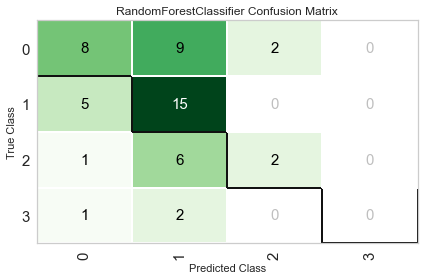

In [24]:
plot_model(tuned_rf , plot = 'confusion_matrix')

### Discretize 

In [25]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=2)

In [26]:
tree_model.fit(dt.dem_ageyear.to_frame(), dt.y_cut)
dt['dem_ageyear']=tree_model.predict_proba(dt.dem_ageyear.to_frame())[:,1] 
tree_model.fit(dt.rbc.to_frame(), dt.y_cut)
dt['rbc']=tree_model.predict_proba(dt.rbc.to_frame())[:,1] 
tree_model.fit(dt.mcv.to_frame(), dt.y_cut)
dt['mcv']=tree_model.predict_proba(dt.mcv.to_frame())[:,1] 
tree_model.fit(dt.mch.to_frame(), dt.y_cut)
dt['mch']=tree_model.predict_proba(dt.mch.to_frame())[:,1] 
tree_model.fit(dt.alt.to_frame(), dt.y_cut)
dt['alt']=tree_model.predict_proba(dt.alt.to_frame())[:,1] 
tree_model.fit(dt.hct.to_frame(), dt.y_cut)
dt['hct']=tree_model.predict_proba(dt.hct.to_frame())[:,1] 
tree_model.fit(dt.pe_bmi.to_frame(), dt.y_cut)
dt['pe_bmi']=tree_model.predict_proba(dt.pe_bmi.to_frame())[:,1] 
#get dem_ageyear_tree -> category predictor

In [78]:
#dt.to_csv('New_pedector_categorical.csv',index=False)

In [72]:
#map cat
from sklearn.preprocessing import LabelEncoder

In [118]:
labelencoder = LabelEncoder()
dt['dem_ageyear'] = labelencoder.fit_transform(dt['dem_ageyear'])
dt['rbc'] = labelencoder.fit_transform(dt['rbc'])
dt['mcv'] = labelencoder.fit_transform(dt['mcv'])
dt['mch'] = labelencoder.fit_transform(dt['mch'])
dt['alt'] = labelencoder.fit_transform(dt['alt'])
dt['hct'] = labelencoder.fit_transform(dt['hct'])
dt['pe_bmi'] = labelencoder.fit_transform(dt['pe_bmi'])

In [120]:
#dt.to_csv('cat_predictor_reLabel.csv',index=False)

### Model 3 with categorical predictors


In [28]:
dt_dis = pd.read_csv('cat_predictor_reLabel.csv')

In [35]:
dt_dis

,dem_ageyear,rbc,mcv,mch,alt,hct,pe_bmi,y_cut
0,1,3,1,2,1,2,2,4
1,1,1,2,3,0,2,2,4
2,1,3,0,3,1,3,2,4
3,1,3,0,0,1,3,3,4
4,1,1,0,0,1,1,2,4
...,...,...,...,...,...,...,...,...
162,0,0,1,2,1,0,0,1
163,2,3,3,3,1,2,2,1
164,0,2,1,2,1,3,3,1
165,0,2,1,2,1,3,2,1


In [30]:
model3 = setup(dt_dis,target ='y_cut')

,Description,Value
0,Session id,2559
1,Target,y_cut
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3"
4,Original data shape,"(167, 8)"
5,Transformed data shape,"(167, 8)"
6,Transformed train set shape,"(116, 8)"
7,Transformed test set shape,"(51, 8)"
8,Numeric features,7
9,Preprocess,True


In [31]:
best1 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.5098,0.4158,0.5098,0.4417,0.4575,0.2245,0.2502,0.0160
lr,Logistic Regression,0.4924,0.4040,0.4924,0.4191,0.4411,0.1813,0.2026,0.0890
ridge,Ridge Classifier,0.4841,0.0000,0.4841,0.4165,0.4318,0.1571,0.1780,0.0130
knn,K Neighbors Classifier,0.4780,0.3643,0.4780,0.4007,0.4294,0.1616,0.1722,0.0220
svm,SVM - Linear Kernel,0.4402,0.0000,0.4402,0.3667,0.3624,0.1195,0.1459,0.0140
lightgbm,Light Gradient Boosting Machine,0.4333,0.3737,0.4333,0.3900,0.3980,0.1061,0.1157,0.0230
dt,Decision Tree Classifier,0.4318,0.3730,0.4318,0.4257,0.3996,0.1043,0.1227,0.0160
nb,Naive Bayes,0.4250,0.3728,0.4250,0.4441,0.4083,0.1729,0.1887,0.0160
et,Extra Trees Classifier,0.4235,0.3644,0.4235,0.3654,0.3809,0.0913,0.0957,0.0580
rf,Random Forest Classifier,0.4220,0.3835,0.4220,0.3832,0.3915,0.1064,0.1088,0.0750


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [32]:
knn1 = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.7019,0.5000,0.4167,0.4500,0.2258,0.2343
1,0.2500,0.5833,0.2500,0.1857,0.2130,-0.2135,-0.2294
2,0.4167,0.6775,0.4167,0.3333,0.3519,0.0870,0.1010
3,0.3333,0.6163,0.3333,0.3730,0.3295,0.0103,0.0112
4,0.5833,0.5935,0.5833,0.4381,0.5000,0.3258,0.3501
5,0.3333,0.4707,0.3333,0.3167,0.3241,-0.0105,-0.0106
6,0.5455,0.0000,0.5455,0.4485,0.4922,0.2254,0.2369
7,0.6364,0.0000,0.6364,0.5212,0.5730,0.3803,0.3998
8,0.6364,0.0000,0.6364,0.5325,0.5758,0.3714,0.3985


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
tuned_knn1 = tune_model(knn1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.6244,0.5000,0.3929,0.4318,0.2088,0.2294
1,0.3333,0.6890,0.3333,0.2500,0.2738,-0.1034,-0.1237
2,0.7500,0.8593,0.7500,0.5694,0.6455,0.6000,0.6429
3,0.4167,0.6176,0.4167,0.3452,0.3712,0.0769,0.0845
4,0.5000,0.6053,0.5000,0.3714,0.4259,0.1910,0.2053
5,0.4167,0.6871,0.4167,0.3194,0.3606,0.0667,0.0714
6,0.4545,0.0000,0.4545,0.4394,0.4091,0.1081,0.1325
7,0.6364,0.0000,0.6364,0.5212,0.5730,0.3803,0.3998
8,0.6364,0.0000,0.6364,0.5265,0.5574,0.3623,0.4139


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [34]:
tuned_knn1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

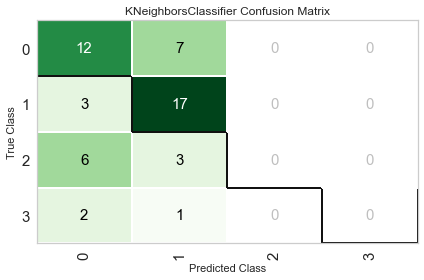

In [36]:
plot_model(tuned_knn1 , plot = 'confusion_matrix')

### nb

In [37]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3333,0.6409,0.3333,0.2222,0.2619,-0.0213,-0.0265
1,0.4167,0.6519,0.4167,0.4403,0.4008,0.2150,0.2396
2,0.4167,0.6818,0.4167,0.5778,0.4279,0.2150,0.2300
3,0.2500,0.6018,0.2500,0.2292,0.2185,-0.0189,-0.0200
4,0.4167,0.5580,0.4167,0.3492,0.3730,0.1158,0.1227
5,0.4167,0.5939,0.4167,0.2917,0.3268,0.2222,0.2857
6,0.6364,0.0000,0.6364,0.7955,0.6970,0.4699,0.4881
7,0.6364,0.0000,0.6364,0.9091,0.7273,0.4884,0.5320
8,0.3636,0.0000,0.3636,0.2020,0.2597,-0.0405,-0.0558


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5833,0.6788,0.5833,0.6250,0.5963,0.3814,0.3855
1,0.4167,0.6835,0.4167,0.4403,0.4008,0.2150,0.2396
2,0.4167,0.7271,0.4167,0.5278,0.4458,0.1515,0.1597
3,0.3333,0.6131,0.3333,0.3194,0.3102,0.0680,0.0700
4,0.4167,0.6359,0.4167,0.3492,0.3730,0.1158,0.1227
5,0.5000,0.6347,0.5000,0.2812,0.3538,0.2800,0.3536
6,0.8182,0.0000,0.8182,0.8182,0.8182,0.7105,0.7105
7,0.6364,0.0000,0.6364,0.9091,0.7273,0.4884,0.5320
8,0.3636,0.0000,0.3636,0.2020,0.2597,-0.1000,-0.1303


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


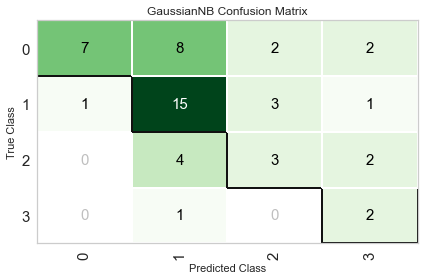

In [39]:
plot_model(tuned_nb , plot = 'confusion_matrix')

### rf

In [40]:
rf1 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7705,0.6667,0.5000,0.5697,0.4667,0.5000
1,0.3333,0.5473,0.3333,0.3333,0.3333,0.0204,0.0204
2,0.5833,0.7214,0.5833,0.5833,0.5768,0.3814,0.3855
3,0.3333,0.5408,0.3333,0.3730,0.3295,0.0103,0.0112
4,0.3333,0.6448,0.3333,0.3194,0.3225,0.0103,0.0104
5,0.3333,0.6103,0.3333,0.3000,0.3148,0.0000,0.0000
6,0.3636,0.0000,0.3636,0.2879,0.2955,-0.0405,-0.0497
7,0.6364,0.0000,0.6364,0.6727,0.6465,0.4430,0.4546
8,0.3636,0.0000,0.3636,0.2273,0.2797,-0.0548,-0.0636


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [41]:
tuned_rf1 = tune_model(rf1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.8280,0.6667,0.5000,0.5697,0.4667,0.5000
1,0.5000,0.7872,0.5000,0.4306,0.4558,0.2500,0.2556
2,0.5000,0.7186,0.5000,0.4167,0.4500,0.2258,0.2343
3,0.3333,0.6158,0.3333,0.2917,0.2963,-0.0435,-0.0505
4,0.3333,0.6622,0.3333,0.3690,0.3333,-0.0549,-0.0572
5,0.5000,0.6892,0.5000,0.4944,0.4676,0.2871,0.3021
6,0.3636,0.0000,0.3636,0.2879,0.2955,-0.0405,-0.0497
7,0.6364,0.0000,0.6364,0.5212,0.5730,0.3803,0.3998
8,0.6364,0.0000,0.6364,0.5265,0.5574,0.3623,0.4139


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


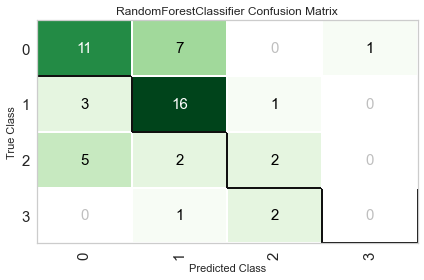

In [42]:
plot_model(tuned_rf1 , plot = 'confusion_matrix')

### Bin 3

In [49]:
bin3 = pd.read_csv('selectAndBin3.csv')

In [50]:
bin3

,dem_ageyear,rbc,mcv,mch,alt,hct,pe_bmi,platelet,ycut3
0,26,5.06,91.9,30.2,36,46.5,19.71374,270,3
1,29,6.19,83.2,26.8,158,51.5,52.75117,349,3
2,25,5.72,75.0,25.7,21,42.9,28.37551,348,3
3,25,5.76,74.1,23.8,26,42.7,18.90179,327,3
4,27,6.61,58.2,19.2,29,38.5,23.41329,296,3
...,...,...,...,...,...,...,...,...,...
162,78,4.02,95.3,31.8,16,38.3,17.88770,124,1
163,66,5.37,85.8,27.7,29,46.1,26.37932,244,1
164,71,4.73,87.3,30.0,19,41.3,18.56326,258,1
165,69,4.71,95.1,30.8,30,44.8,27.46163,239,1


### KNN

In [51]:
model_knn = setup(bin3,target ='ycut3',normalize = True)

,Description,Value
0,Session id,1986
1,Target,ycut3
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(167, 9)"
5,Transformed data shape,"(167, 9)"
6,Transformed train set shape,"(116, 9)"
7,Transformed test set shape,"(51, 9)"
8,Numeric features,8
9,Preprocess,True


In [52]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6295,0.6666,0.6295,0.6128,0.6059,0.3315,0.3501,0.0260
qda,Quadratic Discriminant Analysis,0.6129,0.7020,0.6129,0.6023,0.5832,0.3034,0.3290,0.0230
nb,Naive Bayes,0.6038,0.7167,0.6038,0.6076,0.5924,0.3033,0.3160,0.0210
lda,Linear Discriminant Analysis,0.5795,0.6938,0.5795,0.5699,0.5679,0.2571,0.2624,0.0220
ridge,Ridge Classifier,0.5636,0.0000,0.5636,0.5166,0.5324,0.1972,0.2071,0.0170
rf,Random Forest Classifier,0.5629,0.6987,0.5629,0.5285,0.5342,0.2005,0.2141,0.0790
gbc,Gradient Boosting Classifier,0.5561,0.6595,0.5561,0.5330,0.5327,0.2133,0.2223,0.0870
lightgbm,Light Gradient Boosting Machine,0.5553,0.6472,0.5553,0.5199,0.5255,0.2004,0.2128,0.0270
et,Extra Trees Classifier,0.5530,0.6900,0.5530,0.5260,0.5308,0.2019,0.2091,0.0720
svm,SVM - Linear Kernel,0.5523,0.0000,0.5523,0.5283,0.5219,0.2012,0.2166,0.0200


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [58]:
knn_bin3 = create_model('knn',n_neighbors=5,metric = 'euclidean',p=2) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.7520,0.7500,0.7611,0.7500,0.5663,0.5732
1,0.6667,0.5675,0.6667,0.6667,0.6667,0.4146,0.4146
2,0.6667,0.5591,0.6667,0.7167,0.6131,0.3514,0.4540
3,0.5833,0.6419,0.5833,0.5774,0.5762,0.2593,0.2626
4,0.5000,0.6875,0.5000,0.3889,0.4286,0.0769,0.0870
5,0.5833,0.7208,0.5833,0.4905,0.5328,0.2683,0.2803
6,0.6364,0.7019,0.6364,0.6182,0.6149,0.3433,0.3601
7,0.7273,0.6461,0.7273,0.6727,0.6970,0.4923,0.5010
8,0.5455,0.6935,0.5455,0.5091,0.5253,0.1538,0.1566


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [59]:
tune_knn_bin3 = tune_model(knn_bin3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5833,0.7758,0.5833,0.5208,0.5423,0.2105,0.2209
1,0.5000,0.5556,0.5000,0.4786,0.4811,0.0886,0.0924
2,0.5833,0.7478,0.5833,0.5083,0.4940,0.1892,0.2445
3,0.4167,0.5933,0.4167,0.3542,0.3783,-0.1053,-0.1104
4,0.5833,0.6847,0.5833,0.4792,0.5238,0.2500,0.2665
5,0.5000,0.6535,0.5000,0.4444,0.4667,0.1429,0.1508
6,0.9091,0.9727,0.9091,0.8312,0.8671,0.8254,0.8427
7,0.8182,0.9117,0.8182,0.7403,0.7762,0.6508,0.6644
8,0.4545,0.6987,0.4545,0.4026,0.4266,-0.0476,-0.0486


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [61]:
tune_knn_bin3

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

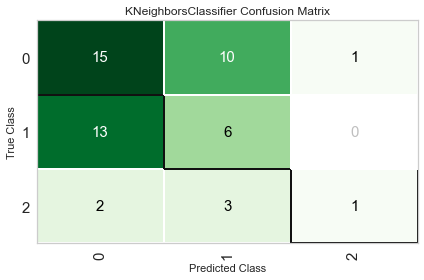

In [62]:
plot_model(tune_knn_bin3 , plot = 'confusion_matrix')

### rf_bin3

In [63]:
rf_bin3 = setup(bin3,target ='ycut3')

,Description,Value
0,Session id,7459
1,Target,ycut3
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(167, 9)"
5,Transformed data shape,"(167, 9)"
6,Transformed train set shape,"(116, 9)"
7,Transformed test set shape,"(51, 9)"
8,Numeric features,8
9,Preprocess,True


In [64]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5962,0.6669,0.5962,0.5530,0.5594,0.2804,0.2920,0.1330
gbc,Gradient Boosting Classifier,0.5932,0.6450,0.5932,0.5664,0.5660,0.2716,0.2803,0.0760
ridge,Ridge Classifier,0.5795,0.0000,0.5795,0.5200,0.5413,0.2297,0.2349,0.0140
lda,Linear Discriminant Analysis,0.5773,0.6772,0.5773,0.5362,0.5462,0.2454,0.2523,0.0180
nb,Naive Bayes,0.5758,0.6723,0.5758,0.5704,0.5561,0.2532,0.2624,0.0180
lightgbm,Light Gradient Boosting Machine,0.5439,0.6275,0.5439,0.4976,0.5130,0.1595,0.1656,0.0230
dt,Decision Tree Classifier,0.5258,0.5992,0.5258,0.5469,0.5182,0.1852,0.1930,0.0180
knn,K Neighbors Classifier,0.5182,0.6183,0.5182,0.4756,0.4862,0.1089,0.1142,0.0250
dummy,Dummy Classifier,0.5182,0.5000,0.5182,0.2690,0.3540,0.0000,0.0000,0.0160
rf,Random Forest Classifier,0.5174,0.6455,0.5174,0.4542,0.4781,0.1058,0.1065,0.0710


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [65]:
rf_bin3 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5833,0.7833,0.5833,0.5417,0.5606,0.2308,0.2343
1,0.5833,0.6960,0.5833,0.5556,0.5417,0.2000,0.2254
2,0.1667,0.3557,0.1667,0.1042,0.1282,-0.4118,-0.4620
3,0.5833,0.8000,0.5833,0.5208,0.5423,0.2105,0.2209
4,0.5000,0.6812,0.5000,0.4405,0.4679,0.1429,0.1448
5,0.6667,0.8427,0.6667,0.5417,0.5952,0.4000,0.4264
6,0.3636,0.2935,0.3636,0.2727,0.3117,-0.2623,-0.2801
7,0.4545,0.5279,0.4545,0.3939,0.4156,-0.0820,-0.0875
8,0.7273,0.7500,0.7273,0.6623,0.6923,0.4762,0.4862


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [66]:
tune_rf_bin3 = tune_model(rf_bin3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8873,0.7500,0.8155,0.7527,0.5765,0.5976
1,0.5833,0.7027,0.5833,0.5625,0.5317,0.2857,0.3123
2,0.4167,0.4623,0.4167,0.4361,0.4087,0.0769,0.0797
3,0.6667,0.8876,0.6667,0.8016,0.6644,0.4607,0.5000
4,0.5833,0.7264,0.5833,0.5516,0.5632,0.3023,0.3061
5,0.7500,0.9014,0.7500,0.7833,0.7500,0.5814,0.5886
6,0.4545,0.3721,0.4545,0.4485,0.4430,0.0149,0.0157
7,0.3636,0.4208,0.3636,0.4000,0.3783,-0.1000,-0.1015
8,0.6364,0.7649,0.6364,0.6182,0.6149,0.3433,0.3601


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


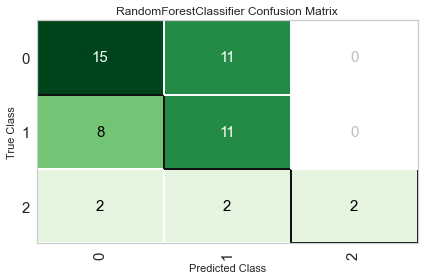

In [67]:
plot_model(tune_rf_bin3 , plot = 'confusion_matrix')

### Discretize

In [82]:
#bin3.to_csv('Discretize_bin3.csv',index=False)

### Discritize model

In [83]:
dis_bin = pd.read_csv('Discretize_bin3.csv')

In [84]:
dis_bin

,dem_ageyear,rbc,mcv,mch,alt,hct,pe_bmi,ycut3
0,1,0,2,2,2,2,1,3
1,1,0,3,3,3,3,2,3
2,1,0,3,3,1,2,2,3
3,1,0,3,1,1,2,1,3
4,1,0,1,1,1,1,0,3
...,...,...,...,...,...,...,...,...
162,0,0,2,2,1,0,1,1
163,0,0,2,2,1,2,2,1
164,0,0,2,2,1,2,1,1
165,0,0,2,2,1,2,2,1


### Model 1 with catergorical predictor bin3

In [85]:
dis_model1 = setup(dis_bin,target ='ycut3')

,Description,Value
0,Session id,5273
1,Target,ycut3
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(167, 8)"
5,Transformed data shape,"(167, 7)"
6,Transformed train set shape,"(116, 7)"
7,Transformed test set shape,"(51, 7)"
8,Numeric features,7
9,Preprocess,True


In [86]:
best_model1 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.6470,0.0000,0.6470,0.5991,0.6078,0.3511,0.3705,0.0180
lda,Linear Discriminant Analysis,0.6386,0.7030,0.6386,0.5975,0.6042,0.3434,0.3608,0.0180
lr,Logistic Regression,0.6379,0.7129,0.6379,0.5828,0.6000,0.3345,0.3504,1.9460
lightgbm,Light Gradient Boosting Machine,0.6371,0.6976,0.6371,0.6083,0.6029,0.3516,0.3732,0.4280
rf,Random Forest Classifier,0.6303,0.6779,0.6303,0.6222,0.6067,0.3364,0.3567,0.0730
et,Extra Trees Classifier,0.6212,0.6625,0.6212,0.6090,0.6011,0.3136,0.3292,0.0650
knn,K Neighbors Classifier,0.6121,0.6230,0.6121,0.5680,0.5712,0.2663,0.2904,0.0230
dt,Decision Tree Classifier,0.6045,0.6051,0.6045,0.5836,0.5784,0.2817,0.2962,0.0180
gbc,Gradient Boosting Classifier,0.5939,0.6605,0.5939,0.5979,0.5699,0.2786,0.3005,0.0720
qda,Quadratic Discriminant Analysis,0.5447,0.6355,0.5447,0.6071,0.5407,0.2686,0.2870,0.0180


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

### rf

In [87]:
rf_dis_bin3 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8543,0.7500,0.7604,0.7205,0.5500,0.6074
1,0.6667,0.7421,0.6667,0.6250,0.6349,0.3684,0.3865
2,0.7500,0.8952,0.7500,0.8333,0.7222,0.5714,0.6247
3,0.6667,0.7311,0.6667,0.6250,0.6349,0.3684,0.3865
4,0.5000,0.5854,0.5000,0.4190,0.4558,0.1220,0.1274
5,0.3333,0.4219,0.3333,0.3333,0.3300,-0.0667,-0.0674
6,0.7273,0.8519,0.7273,0.8364,0.7596,0.5600,0.5842
7,0.6364,0.6130,0.6364,0.5818,0.6061,0.3231,0.3288
8,0.7273,0.6286,0.7273,0.7229,0.7183,0.5000,0.5082


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [88]:
tune_rf_dis3 = tune_model(rf_dis_bin3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5833,0.7477,0.5833,0.5208,0.5423,0.2105,0.2209
1,0.6667,0.8633,0.6667,0.7167,0.6131,0.3514,0.4540
2,0.8333,0.9924,0.8333,0.7917,0.7989,0.6842,0.7178
3,0.7500,0.7839,0.7500,0.7500,0.7125,0.5200,0.5861
4,0.5833,0.6368,0.5833,0.5000,0.5238,0.2308,0.2611
5,0.5000,0.5458,0.5000,0.5000,0.4667,0.1818,0.2132
6,0.5455,0.6552,0.5455,0.5649,0.5256,0.2029,0.2269
7,0.7273,0.7669,0.7273,0.6623,0.6923,0.4762,0.4862
8,0.3636,0.4539,0.3636,0.3247,0.3427,-0.2222,-0.2269


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


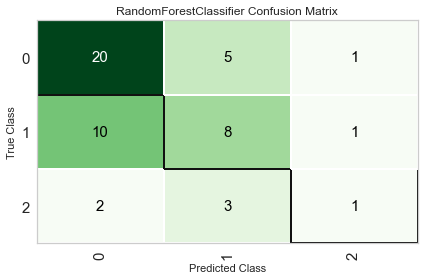

In [89]:
plot_model(tune_rf_dis3 , plot = 'confusion_matrix')

### NB

In [90]:
nb_dis_bin3 = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.6403,0.5000,0.5083,0.5000,0.1325,0.1341
1,0.1667,0.6044,0.1667,0.2000,0.1818,-0.1215,-0.1716
2,0.9167,1.0000,0.9167,0.8452,0.8782,0.8442,0.8579
3,0.5833,0.7897,0.5833,0.5381,0.5505,0.2405,0.2508
4,0.4167,0.7049,0.4167,0.4333,0.4209,0.0667,0.0674
5,0.5000,0.6878,0.5000,0.6333,0.4405,0.2174,0.3371
6,0.5455,0.7494,0.5455,0.5909,0.5455,0.2361,0.2500
7,0.3636,0.6013,0.3636,0.4848,0.3879,0.0000,0.0000
8,0.4545,0.5844,0.4545,0.4182,0.4343,-0.0154,-0.0157


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [93]:
tune_nb_dis3 = tune_model(nb_dis_bin3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.6403,0.5000,0.5083,0.5000,0.1325,0.1341
1,0.6667,0.5925,0.6667,0.6250,0.6349,0.3684,0.3865
2,0.9167,1.0000,0.9167,0.8452,0.8782,0.8442,0.8579
3,0.5833,0.7897,0.5833,0.5381,0.5505,0.2405,0.2508
4,0.4167,0.7049,0.4167,0.4333,0.4209,0.0667,0.0674
5,0.5000,0.6878,0.5000,0.6333,0.4405,0.2174,0.3371
6,0.5455,0.7494,0.5455,0.5909,0.5455,0.2361,0.2500
7,0.3636,0.6377,0.3636,0.4848,0.3879,0.0000,0.0000
8,0.4545,0.5844,0.4545,0.4182,0.4343,-0.0154,-0.0157


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


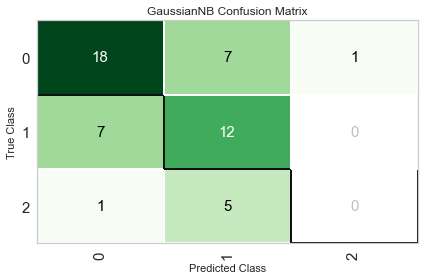

In [94]:
plot_model(tune_nb_dis3 , plot = 'confusion_matrix')